this is called demodulation 1 because I'm not sure about units. 
Testing the basic function

Mira

In [241]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import pickle
import seaborn as sns
import sys
import numpy as np
import scipy.optimize as op
from scipy.optimize import curve_fit


sns.set_palette("PuBuGn_d",15)
sns.set_style("whitegrid")
import emcee

from scipy.signal import hilbert, chirp, butter

In [242]:
#with open('../../data/processed_data/data_with_old_adc/oldfts_contrast_nofts.txt') as f:
    #data = f.readlines()[10:]

In [243]:
#old ADC data?
data = np.genfromtxt('../../data/processed_data/data_with_old_adc/newfts_contrast_0_01mms_x.txt',
                     skip_header=10, usecols=(0) )
#dt = .003906, df = 1dt = 256

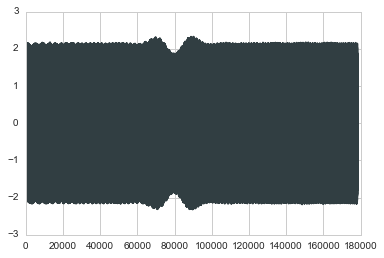

In [244]:
pl.plot(data)

In [245]:
#b,a = butter(256, 4000, 'low') #low pass filter!!!

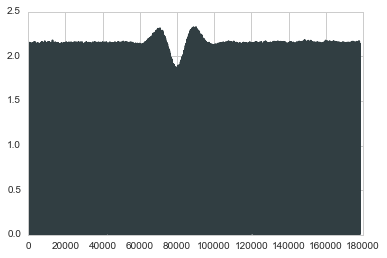

In [246]:
pl.plot(abs(data))

In [247]:
A = data
S = np.fft.fft(A)

(0, 60000)

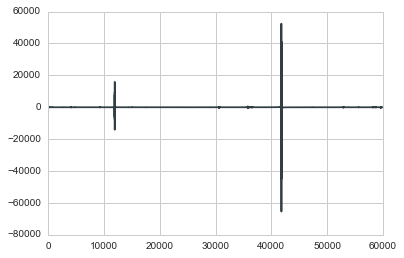

In [248]:
pl.plot(S)
pl.xlim (0,60000)

In [249]:
ansig = hilbert(data)
envel = np.abs(ansig)

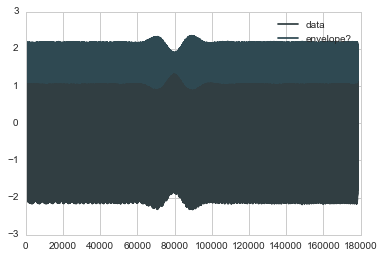

In [250]:
pl.plot(data, label = 'data')
pl.plot(envel, label = 'envelope?')
pl.legend()
pl.show()

In [251]:
#current data found

In [252]:
file=open( '../../data/raw_data/20160923_1613_20160923_400aperture_2cms_chopperon.pkl' , 'rb')
d=pickle.load(file)
file.close()

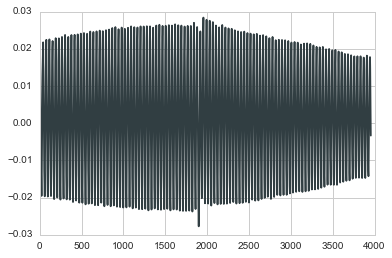

In [253]:
D = (d['sig0F']) 
pl.plot(D)

In [254]:
#i = 12
Nsize = 3800
#2**i
dt=(1/(d['sample freq']))
t=dt*np.arange(Nsize)
v=(d['speed'])
x = v*t
dx = dt*v
total_t = (d['scan time'])
    
total_s = (d['samples requested'])
#startpt = ((total_s - Nsize)/2) 
startpt = 0
endpt = startpt + Nsize

A = d['sig0F']
A = A[startpt:endpt]
S = np.fft.rfft(A)

S = S[:-1]

#pl.xlim(0,500)
#pl.ylim(-1,1)

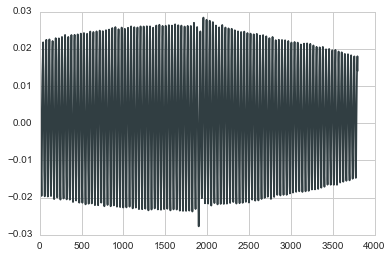

In [255]:
pl.plot(A)

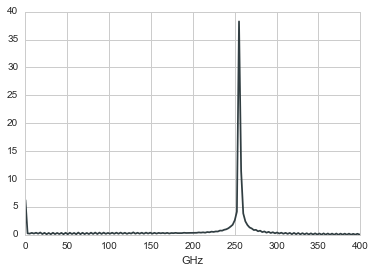

In [256]:
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)
pl.plot(300*Nu, np.abs(S))

pl.xlim(0,400)
pl.xlabel('GHz')
#fft of the plot? Find the carrier frequency? is the carrier frequency ~ 250

In [216]:
fs = d['sample freq']
print fs

640.0


In [239]:
def lowpass(cutoff, fs, order = 5):
    nyq = .5*fs #make half cycles
    n_cutoff = cutoff/nyq #wn from 0 to 1
    b,a = butter(order, n_cutoff, btype = 'low', analog = False)
    return b,a

def lowpass_filter(data, cutoff, fs, order):
    b,a = lowpass(cutoff, fs, order = order)
    y =lfilter(b,a,data)
    return y

order = 6
fs = 640 #what are the units? Hz (not GHz)? If so, how to make a filter low enough?
cutoff = 150
data = A

b, a = butter_lowpass(cutoff, fs, order)

w,h = freqz(b,a,worN=8000)

y = lowpass_filter(data, cutoff, fs, order)

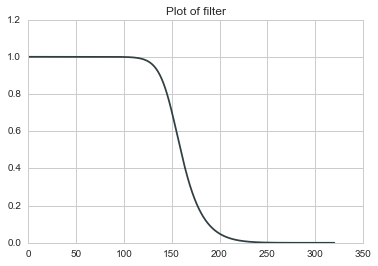

In [240]:
pl.plot(.5*fs*w/np.pi, np.abs(h))
pl.title('Plot of filter')
#pl.xlim(0,1)


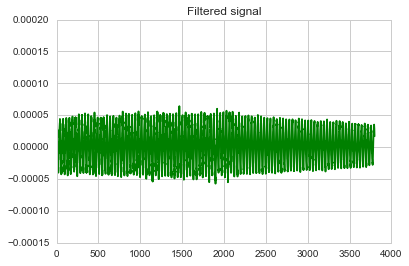

In [237]:
#pl.plot(A, 'b-')
pl.plot(y, 'g-')
pl.title('Filtered signal')
#filtered signal?? 

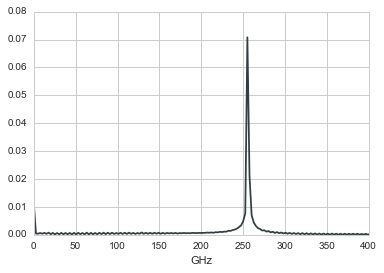

In [238]:
#Why does the spectrum not look any different? And shouldn't there be sidebands?
#and if the filter is supposed to block frequencies higher than 100, how is it they are just as prominent?
S = np.fft.rfft(y)

S = S[:-1]
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)
pl.plot(300*Nu, np.abs(S))

pl.xlim(0,400)
pl.xlabel('GHz')

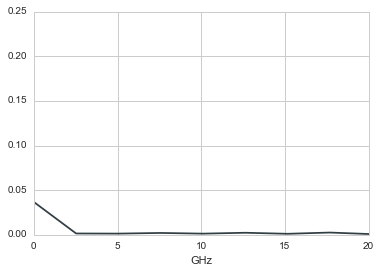

In [234]:
pl.plot(300*Nu, np.abs(S))

pl.xlim(0,20)
pl.xlabel('GHz')
#is that (bottom left) the BB spectrum? 